In [7]:
# 引入库
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
# 检查os位置
print(os.getcwd())

/Users/wolves/Downloads/project/python/pt/lab


In [9]:
  # 生成数据
  def generate_data():
      w = 1.35
      b = 2.89
      x_min = 0
      x_max = 10
      x = np.linspace(x_min, x_max, 100)
      y = w * x + b
      y += np.random.normal(scale=0.5, size=y.shape)
      data = np.column_stack((x, y))
      return data

  # 保存数据
  def save_data(filename, data):
      np.savetxt(filename, data, delimiter=',')
      print(f"{filename} 已成功创建并写入数据。")

  # 生成并保存数据
  data = generate_data()
  #save_data('./1_data.txt', data)

In [10]:
# 读取数据
#points = np.genfromtxt("./1_data.txt", delimiter=',')

points = data
 
x = points[:, 0]
y = points[:, 1]

损失函数: 
$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (y_{w,b}(x^{(i)}) - y^{(i)})^2$$

梯度下降：

分别对w和b求偏导数，然后更新w和b
$$
w = w - \alpha\cdot\frac{\partial J(w,b)}{\partial w}
$$

$$
b = b - \alpha\cdot\frac{\partial J(w,b)}{\partial b}
$$

In [11]:
# 定义损失函数
def compute_loss(w,b):
    return np.sum((y-w*x-b)**2)/(2*len(x))

# 等效
def compute_loss_equivalent(w,b):
    sum = 0
    for i in range(len(x)):
        sum += (y[i] - (w*x[i]+b))**2
    return sum/(2*len(x))

# 定义梯度下降
def gradient_descent(w,b,alpha,num_iter):
    m = len(x)
    for _ in range(num_iter):
        # 计算梯度
        dw = -np.sum(x*(y-w*x-b))/m
        db = -np.sum(y-w*x-b)/m
        # 更新w和b
        w = w - alpha*dw
        b = b - alpha*db
    return w,b

w: 1.368169058216238
b: 2.770596744047831
loss: 0.1375443007342851


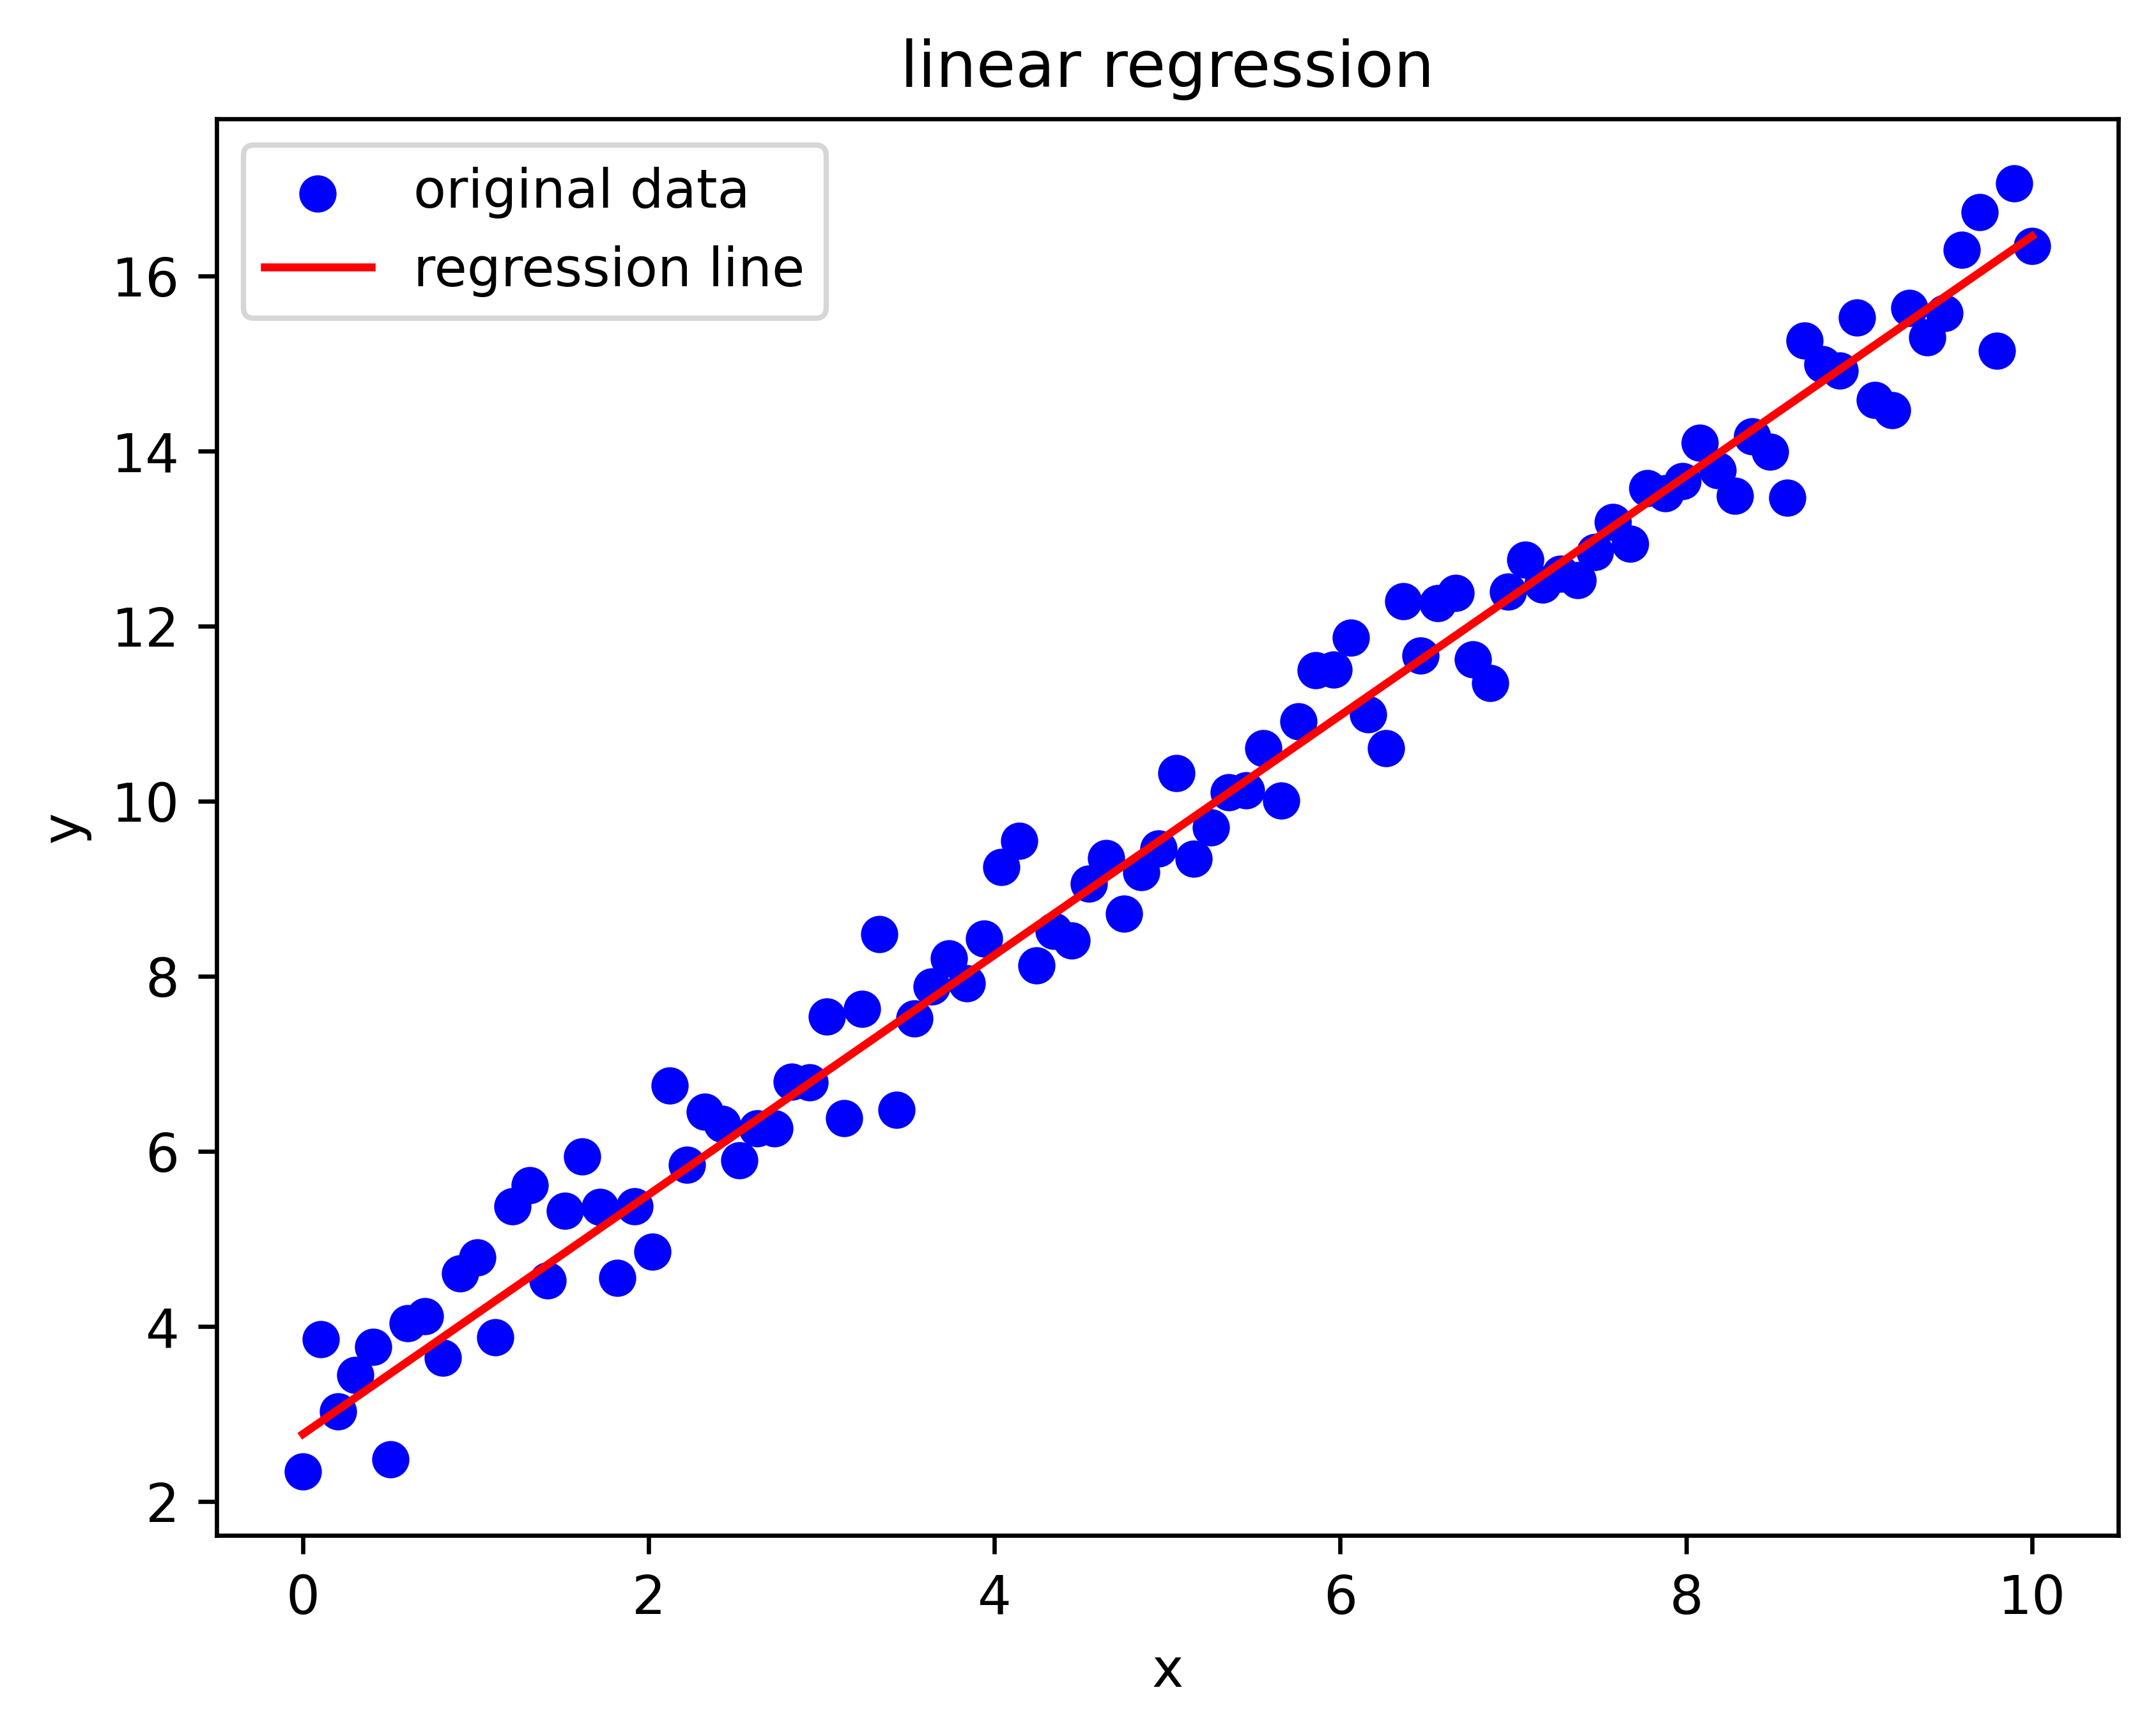

In [12]:
# 主函数
if __name__ == "__main__":
    # 初始化w和b
    w,b = 0,0
    # 设置学习率
    alpha = 0.01
    # 设置迭代次数
    num_iter = 1000
    # 进行梯度下降
    w,b = gradient_descent(w,b,alpha,num_iter)
    print("w:", w)
    print("b:", b)
    # 计算损失
    loss = compute_loss(w,b)
    print("loss:", loss)

    plt.figure(dpi=600)
    #plt.switch_backend('Agg')  # 使用 Agg 渲染器
    # 绘制数据点
    plt.scatter(x, y, color='blue', label='original data')

    # 绘制回归直线
    plt.plot(x, w*x + b, color='red', label='regression line')

    # 添加标题和标签
    plt.title('linear regression')
    plt.xlabel('x')
    plt.ylabel('y')

    # 显示图例
    plt.legend()

    # 显示图像
    plt.show()